## Exercise 2.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn import datasets, linear_model, model_selection, __version__
print("sklearn.__version__ is ", __version__)

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()

sklearn.__version__ is  1.1.3


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [3]:
# Cleaning up the data

from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [4]:
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

In [5]:
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = pumpkins.loc[:, columns_to_select]

pumpkins.dropna(inplace=True)

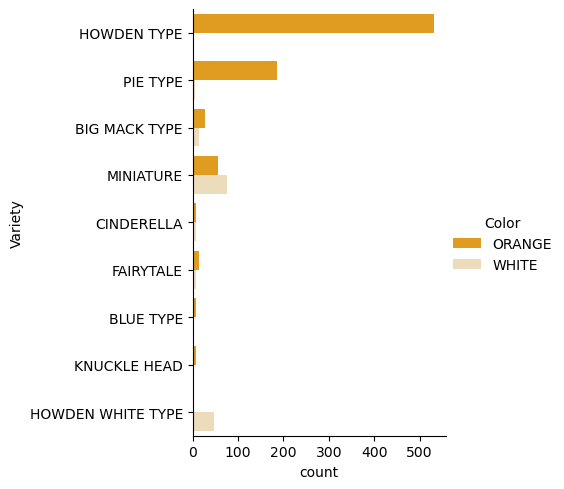

In [6]:
# Visualizing count by variety

import seaborn as sns

palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette, 
)

In [7]:
#x_df = pd.DataFrame(new_pumpkins)
size = pumpkins['Item Size']
print(size)

color = pumpkins['Color']
print(color)

2        med
3        med
4        lge
5        lge
6        med
        ... 
1694    xlge
1695    xlge
1696    xlge
1697    xlge
1698    xlge
Name: Item Size, Length: 991, dtype: object
2       ORANGE
3       ORANGE
4       ORANGE
5       ORANGE
6       ORANGE
         ...  
1694     WHITE
1695     WHITE
1696     WHITE
1697     WHITE
1698     WHITE
Name: Color, Length: 991, dtype: object


In [8]:
size_df = pd.DataFrame(size)
size = size_df['Item Size']
size_np = size.values
size_np = size_np[:, np.newaxis]
print("size: ", size)

color_df = pd.DataFrame(color)
color = color_df['Color']
color_np = color.values
color_np = color_np[:, np.newaxis]
print("color: ", color)

size:  2        med
3        med
4        lge
5        lge
6        med
        ... 
1694    xlge
1695    xlge
1696    xlge
1697    xlge
1698    xlge
Name: Item Size, Length: 991, dtype: object
color:  2       ORANGE
3       ORANGE
4       ORANGE
5       ORANGE
6       ORANGE
         ...  
1694     WHITE
1695     WHITE
1696     WHITE
1697     WHITE
1698     WHITE
Name: Color, Length: 991, dtype: object


In [9]:
X = size_df['Item Size'].to_numpy().reshape(-1, 1)
Y = color_df['Color']

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

size_df['Item Size'] = label_encoder.fit_transform(size_df['Item Size'])
color_df['Color'] = label_encoder.fit_transform(color_df['Color'])

print(size_df)
print(color_df)

      Item Size
2             3
3             3
4             2
5             2
6             3
...         ...
1694          6
1695          6
1696          6
1697          6
1698          6

[991 rows x 1 columns]
      Color
2         0
3         0
4         0
5         0
6         0
...     ...
1694      1
1695      1
1696      1
1697      1
1698      1

[991 rows x 1 columns]


In [12]:
size_df['Item Size'] = label_encoder.inverse_transform(size_df['Item Size'])
color_df['Color'] = label_encoder.inverse_transform(color_df['Color'])

ValueError: y contains previously unseen labels: [2 3 4 5 6]

In [ ]:
#train a linear regression model
X_train, X_test, y_train, y_test = model_selection.train_test_split(size_np, color_np, test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'sml'